In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\hnguy\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency flag,first_name,last_name,gender,state,age,date_joined,no_dependants,marital status,income
0,2539329,1,1,2,8,NaN,False,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,True,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,True,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,True,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,True,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


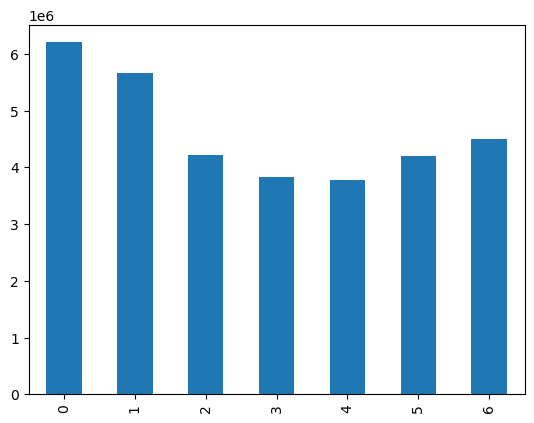

In [5]:
#create bar graph of the numbers of orders per days of week
bar = df['orders_days_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#filter out all the irregular prices, such as those greater than 100
df.loc[df['prices'] > 100, 'prices'] = np.nan

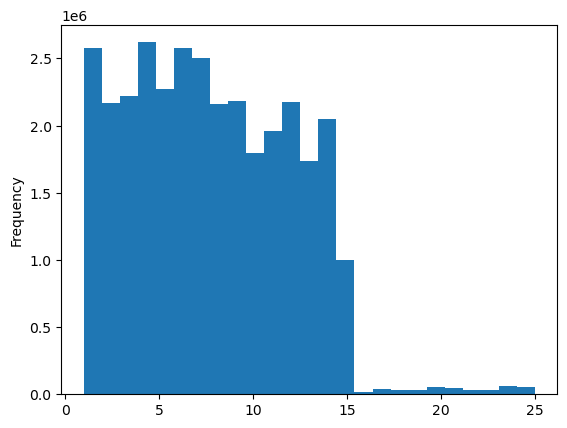

In [7]:
hist = df['prices'].plot.hist(bins = 25)

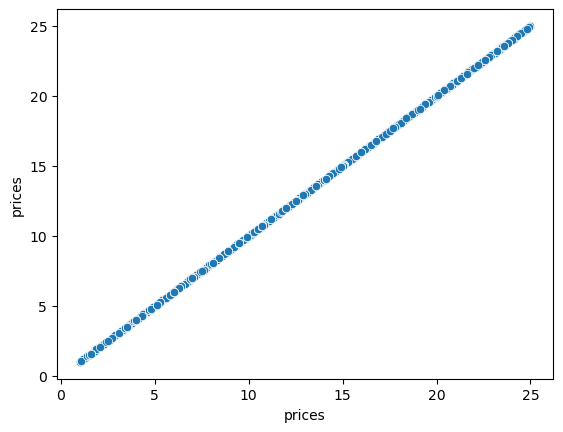

In [8]:
#create scatterplot of the prices
scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [9]:
#create random sample
np.random.seed(4)

In [10]:
dev = np.random.rand(len(df)) <= 0.7

In [11]:
#store 70% of dataframe in big sample
big = df[dev]

In [12]:
#store 30% of dataframe in small sample
small = df[~dev]

In [13]:
#check the number of rows
len(big) + len(small)

32404859

In [14]:
#reducing sample to only specific columns
df_2 = small[['orders_days_of_week', 'prices']]

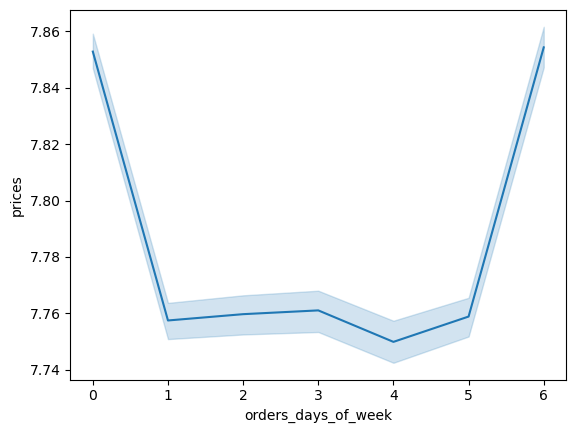

In [17]:
#create a line chart of orders per days of week vs prices
line = sns.lineplot(data = df_2, x = 'orders_days_of_week', y = 'prices')

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the "order_hour_of_day" column. In a markdown cell beneath your histogram, describe what the histogram demonstrates. 

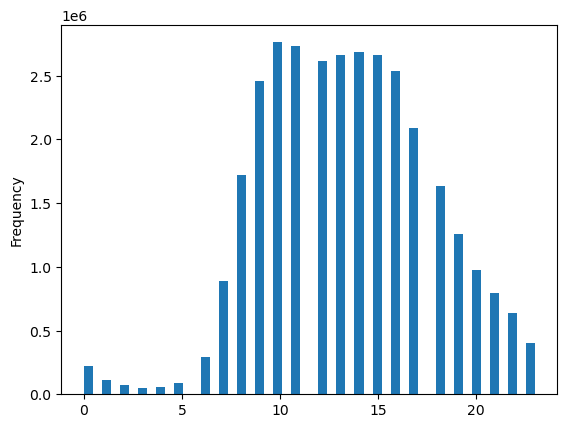

In [19]:
#create histogram of the "order_hour_of_day" column
hist2 = df['order_hour_of_day'].plot.hist(bins = 50)

Most orders were placed between 9am - 4pm. After 4pm, the number of orders started to drop off.

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag" column.

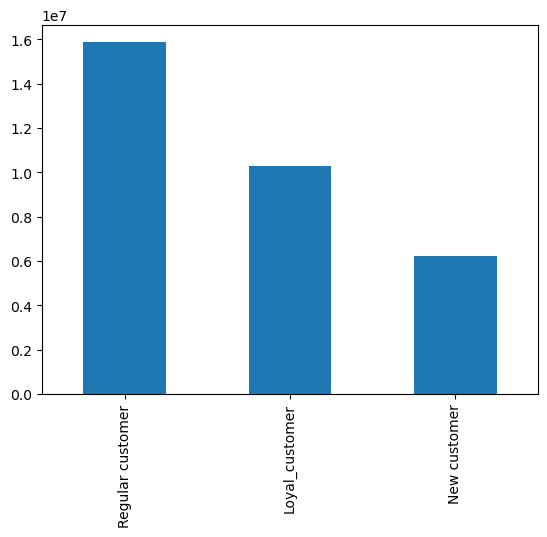

In [20]:
#create bar chart of "loyalty_flag" column
bar2 = df['loyalty_flag'].value_counts().plot.bar()

Check whether there's a difference in expenditure (the "prices" column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [21]:
#create sample using only "order_hour_of_day" and "prices" columns
df_small_2 = small[['order_hour_of_day', 'prices']]

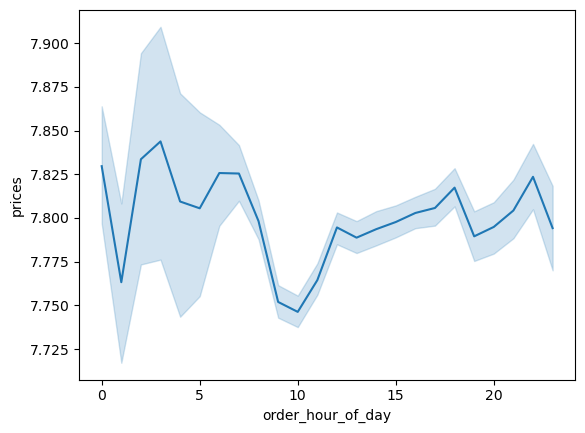

In [22]:
#create line chart to show differences in prices depending on hour of day
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day', y = 'prices')

Based on this line chart, we can tell that customers mostly place their orders in the morning. From 5am - 10am, there is a dramatic decrease. After 10am, orders start to steadily increase.

Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents. In a markdown cell beneath your line chart, describe what the line chart shows.

In [24]:
#create small sample using only "age" and "no_dependants" columns
df_small_3 = small[['age', 'no_dependants']]

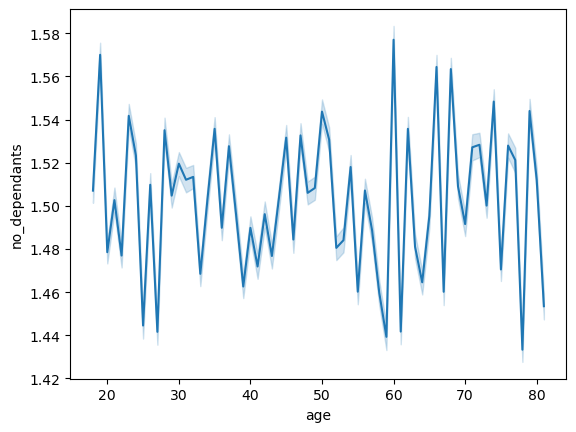

In [25]:
#create line chart of age vs number of dependants
line_3 = sns.lineplot(data = df_small_3, x = 'age', y = 'no_dependants')

There is no clear connection between age and the number of dependants.

You'll also need to explore whether there's a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows. 

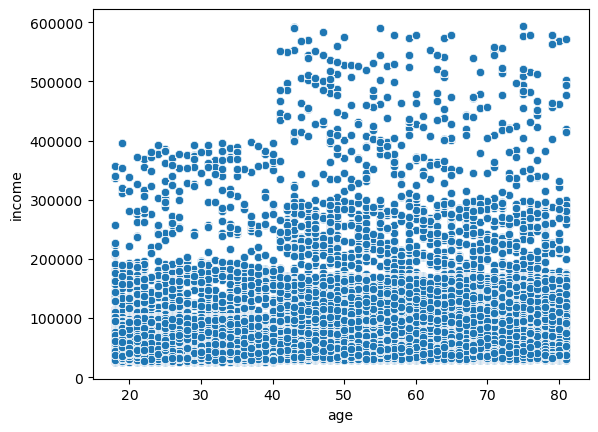

In [26]:
#create scatterplot of age vs income
scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df)

The scatterplot shows that people aged 20-40 have lower incomes than people who are over 40. We can say that spending power increases after a certain age.

In [27]:
#export all charts
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [28]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [29]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [30]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [31]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

In [32]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [33]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [34]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_no_dependants.png'))

In [35]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))